# Data Description from the data source

  #Categorical Variables
  - Clientnum: Unique identifier for the customer holding the account
  - Attrition_Flag: flag to indicate if the customer is an existing customer or has attrited
  - Customer_Age: Customer's Age in Years
  - Gender: M=Male, F=Female
  - Dependent_count: Number of dependents
  - Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)
  - Marital_Status: Demographic variable - Married, Single, Unknown
  - Income_Category: Demographic variable - Annual Income Category of the account holder (<40K ,40K - 60K,60K - 80K,80K - 120K, > $120K, Unknown)

  #Numerical Variables
  - Card_Category: Type of Card (Blue, Silver, Gold, Platinum)
  - Months_on_book: Months on book (Time of Relationship)
  - Total_Relationship_Count: Total no. of products held by the customer
  - Months_Inactive_12_mon: No. of months inactive in the last 12 months
  - Contacts_Count_12_mon: Num No. of Contacts in the last 12 months
  - Credit_Limit: Credit Limit on the Credit Card
  - Total_Revolving_Bal: Total Revolving Balance on the Credit Card
  - Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
  - Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
  - Total_Trans_Amt: Total Transaction Amount (Last 12 months)
  - Total_Trans_Ct: Total Transaction Count (Last 12 months)
  - Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
  - Avg_Utilization_Ratio: Average Card Utilization Ratio

# Libraries to import

In [114]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import warnings
from sklearn.metrics import roc_curve

from scipy.stats import boxcox



# Sklearn
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# ML Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



import warnings
warnings.filterwarnings("ignore")

# Load Data 

In [115]:
dataset= pd.read_csv('F:/numdataset/credit_cardCustomer.csv')
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Dataset Samples 

In [116]:
dataset.shape

(10127, 23)

In [117]:
dataset.sample()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
2912,780704358,Existing Customer,34,M,3,Post-Graduate,Unknown,$60K - $80K,Silver,23,...,27710.0,0,27710.0,0.777,4014,73,0.659,0.0,0.000073,0.99993


# Explore Data

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [119]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [120]:
dataset.columns = ['CLIENTNUM', 'AttritionFlag', 'CustomerAge', 'Gender',
       'Dependentcount', 'EducationLevel', 'MaritalStatus',
       'IncomeCategory', 'CardCategory', 'MonthsOnBook',
       'TotalRelationshipCount', 'MonthsInactive12mon',
       'ContactsCount12mon', 'CreditLimit', 'TotalRevolvingBal',
       'AvgOpenToBuy', 'TotalAmtChngQ4_Q1', 'TotalTransAmt',
       'TotalTransCt', 'TotalCtChngQ4_Q1', 'AvgUtilizationRatio',
       'NaiveClassifiermon1',
       'NaiveClassifiermon2']

In [121]:
dataset.columns

Index(['CLIENTNUM', 'AttritionFlag', 'CustomerAge', 'Gender', 'Dependentcount',
       'EducationLevel', 'MaritalStatus', 'IncomeCategory', 'CardCategory',
       'MonthsOnBook', 'TotalRelationshipCount', 'MonthsInactive12mon',
       'ContactsCount12mon', 'CreditLimit', 'TotalRevolvingBal',
       'AvgOpenToBuy', 'TotalAmtChngQ4_Q1', 'TotalTransAmt', 'TotalTransCt',
       'TotalCtChngQ4_Q1', 'AvgUtilizationRatio', 'NaiveClassifiermon1',
       'NaiveClassifiermon2'],
      dtype='object')

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENTNUM               10127 non-null  int64  
 1   AttritionFlag           10127 non-null  object 
 2   CustomerAge             10127 non-null  int64  
 3   Gender                  10127 non-null  object 
 4   Dependentcount          10127 non-null  int64  
 5   EducationLevel          10127 non-null  object 
 6   MaritalStatus           10127 non-null  object 
 7   IncomeCategory          10127 non-null  object 
 8   CardCategory            10127 non-null  object 
 9   MonthsOnBook            10127 non-null  int64  
 10  TotalRelationshipCount  10127 non-null  int64  
 11  MonthsInactive12mon     10127 non-null  int64  
 12  ContactsCount12mon      10127 non-null  int64  
 13  CreditLimit             10127 non-null  float64
 14  TotalRevolvingBal       10127 non-null

# Check null values

In [123]:
dataset.isnull().sum()

CLIENTNUM                 0
AttritionFlag             0
CustomerAge               0
Gender                    0
Dependentcount            0
EducationLevel            0
MaritalStatus             0
IncomeCategory            0
CardCategory              0
MonthsOnBook              0
TotalRelationshipCount    0
MonthsInactive12mon       0
ContactsCount12mon        0
CreditLimit               0
TotalRevolvingBal         0
AvgOpenToBuy              0
TotalAmtChngQ4_Q1         0
TotalTransAmt             0
TotalTransCt              0
TotalCtChngQ4_Q1          0
AvgUtilizationRatio       0
NaiveClassifiermon1       0
NaiveClassifiermon2       0
dtype: int64

In [124]:
cat_columns = dataset.select_dtypes(include = ['object']).nunique(dropna=False)
print(cat_columns)

AttritionFlag     2
Gender            2
EducationLevel    7
MaritalStatus     4
IncomeCategory    6
CardCategory      4
dtype: int64


# Drop non-informative columns

In [125]:
dataset = dataset.drop('CLIENTNUM', axis=1)
dataset = dataset.drop(columns=['NaiveClassifiermon1','NaiveClassifiermon2'], axis=1)

# Exploratory Data Analysis

Existing Customer    8500
Attrited Customer    1627
Name: AttritionFlag, dtype: int64


<AxesSubplot:xlabel='AttritionFlag', ylabel='count'>

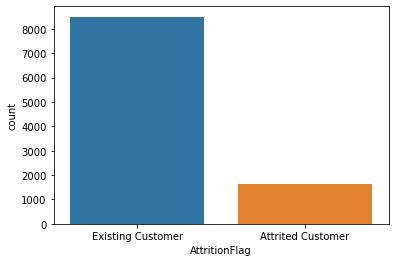

In [126]:
import seaborn as sns

# target is Attrition_Flag
print(dataset['AttritionFlag'].value_counts())
sns.countplot(x="AttritionFlag", data=dataset)

<AxesSubplot:xlabel='Gender'>

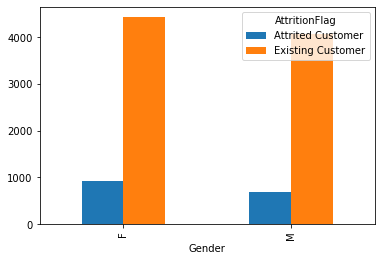

In [127]:
pt = dataset[['Gender','AttritionFlag']].pivot_table(index='Gender', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

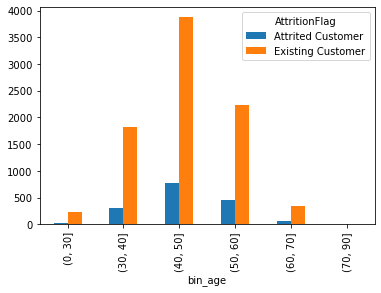

In [128]:
dataset['bin_age'] = pd.cut(dataset.CustomerAge, [0,30,40,50,60,70,90])

pt = dataset[['bin_age','AttritionFlag']].pivot_table(index='bin_age', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()
dataset = dataset.drop('bin_age', axis=1)

<AxesSubplot:xlabel='IncomeCategory'>

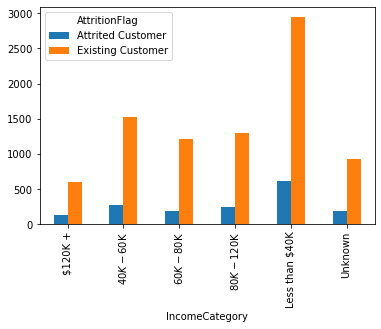

In [129]:
pt = dataset[['IncomeCategory','AttritionFlag']].pivot_table(index='IncomeCategory', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

<AxesSubplot:xlabel='CardCategory'>

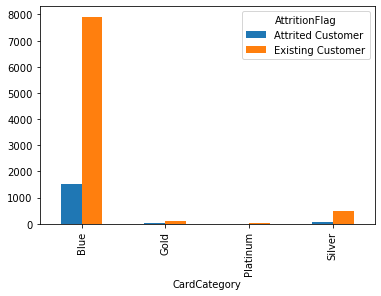

In [130]:
pt = dataset[['CardCategory','AttritionFlag']].pivot_table(index='CardCategory', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

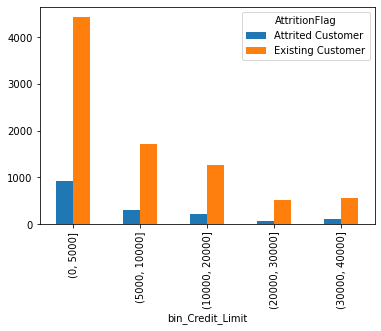

In [131]:
dataset['bin_Credit_Limit'] = pd.cut(dataset.CreditLimit, [0,5000,10000,20000,30000,40000])

pt = dataset[['bin_Credit_Limit','AttritionFlag']].pivot_table(index='bin_Credit_Limit', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()
dataset = dataset.drop('bin_Credit_Limit', axis=1)

<AxesSubplot:xlabel='TotalRelationshipCount'>

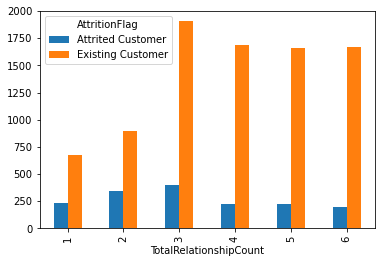

In [132]:
pt = dataset[['TotalRelationshipCount','AttritionFlag']].pivot_table(index='TotalRelationshipCount', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

<AxesSubplot:xlabel='MonthsInactive12mon'>

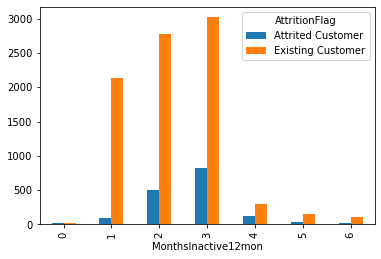

In [133]:
pt = dataset[['MonthsInactive12mon','AttritionFlag']].pivot_table(index='MonthsInactive12mon', columns='AttritionFlag', aggfunc=len, fill_value=0)
pt.plot.bar()

# Preprocess the data

In [134]:
dataset['AttritionFlag'] = dataset['AttritionFlag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
dataset['AttritionFlag'].value_counts()

0    8500
1    1627
Name: AttritionFlag, dtype: int64

In [135]:
dataset['Gender'] = dataset['Gender'].replace({'F': 0, 'M': 1})
dataset['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_features = dataset.select_dtypes(exclude=['object'])
numerical_features = numerical_features.drop(['AttritionFlag', 'Gender'], axis=1)
dataset[numerical_features.columns] = sc.fit_transform(numerical_features)

In [137]:
categorical_features = dataset.select_dtypes(include=['object']).columns.values.tolist()
dataset = pd.get_dummies(dataset, columns=categorical_features)
dataset.head()

,AttritionFlag,CustomerAge,Gender,Dependentcount,MonthsOnBook,TotalRelationshipCount,MonthsInactive12mon,ContactsCount12mon,CreditLimit,TotalRevolvingBal,...,IncomeCategory_$120K +,IncomeCategory_$40K - $60K,IncomeCategory_$60K - $80K,IncomeCategory_$80K - $120K,IncomeCategory_Less than $40K,IncomeCategory_Unknown,CardCategory_Blue,CardCategory_Gold,CardCategory_Platinum,CardCategory_Silver
0,0,-0.165406,1,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,...,0,0,1,0,0,0,1,0,0,0
1,0,0.333570,0,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,...,0,0,0,0,1,0,1,0,0,0
2,0,0.583058,1,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,...,0,0,0,1,0,0,1,0,0,0
3,0,-0.789126,0,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,...,0,0,0,0,1,0,1,0,0,0
4,0,-0.789126,1,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,...,0,0,1,0,0,0,1,0,0,0


In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AttritionFlag                  10127 non-null  int64  
 1   CustomerAge                    10127 non-null  float64
 2   Gender                         10127 non-null  int64  
 3   Dependentcount                 10127 non-null  float64
 4   MonthsOnBook                   10127 non-null  float64
 5   TotalRelationshipCount         10127 non-null  float64
 6   MonthsInactive12mon            10127 non-null  float64
 7   ContactsCount12mon             10127 non-null  float64
 8   CreditLimit                    10127 non-null  float64
 9   TotalRevolvingBal              10127 non-null  float64
 10  AvgOpenToBuy                   10127 non-null  float64
 11  TotalAmtChngQ4_Q1              10127 non-null  float64
 12  TotalTransAmt                  10127 non-null 

In [139]:
dataset.shape

(10127, 37)

# Dimensional Reduction

In [140]:
y = dataset['AttritionFlag']
X = dataset.drop('AttritionFlag', axis=1)

In [141]:
from sklearn.decomposition import PCA
pca = PCA(0.95) 
pca.fit(X)
X_pca = pca.transform(X)

print(f'Shape of X before PCA: {X.shape}')
print(f'Shape of X after PCA: {X_pca.shape}')

Shape of X before PCA: (10127, 36)
Shape of X after PCA: (10127, 20)


# Build the model

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [143]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.05, use_label_encoder=False)
gbm = gbm.fit(X_train, y_train)

# Evaluate the Model

In [144]:
print("Accuracy on training set: {:.3f}".format(gbm.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbm.score(X_test, y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.917


In [145]:
print("The training data size is : {} ".format(X_train.shape))
print("The test data size is : {} ".format(X_test.shape))

The training data size is : (7595, 36) 
The test data size is : (2532, 36) 


# Implementing SVM with Scikit-Learn

Dividing data into training and test sets.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Fitting method of SVC class.

In [147]:
svclassifier = SVC(kernel='linear', random_state = 0)
svclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Making Predictions.

In [148]:
y_pred = svclassifier.predict(X_test)

confusion matrix

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1630   40]
 [ 151  205]]


0.9057255676209279

Evaluating the Algorithm

In [150]:
print('Simple SVM')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Simple SVM
[[1630   40]
 [ 151  205]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      1670
           1       0.84      0.58      0.68       356

    accuracy                           0.91      2026
   macro avg       0.88      0.78      0.81      2026
weighted avg       0.90      0.91      0.90      2026



# Implementing Kernel SVM with Scikit-Learn.

In [151]:
X = dataset.drop('AttritionFlag', axis=1)
y = dataset['AttritionFlag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

# Polynomial Kernel:

In [152]:
svclassifier = SVC(kernel ='poly', degree = 4)

In [153]:
svclassifier.fit(X_train, y_train)

SVC(degree=4, kernel='poly')

Making Predictions.

In [154]:
y_pred = svclassifier.predict(X_test)

Evaluating the Algorithm

In [155]:
print('Poly karnel')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Poly karnel
[[1679   25]
 [ 104  218]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1704
           1       0.90      0.68      0.77       322

    accuracy                           0.94      2026
   macro avg       0.92      0.83      0.87      2026
weighted avg       0.93      0.94      0.93      2026



# Gaussian Kernel

In [156]:
X = dataset.drop('AttritionFlag', axis=1)
y = dataset['AttritionFlag']

In [157]:
y[y == 0] = -1
X = RobustScaler().fit_transform(X)

In [158]:
# For `zero_division` control I need to RobustScalar and change label '0' to '1'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

Fitting method of SVC class with Gaussian Kernel.

In [159]:
svclassifier = SVC(kernel='rbf')

svclassifier.fit(X_train, y_train)

SVC()

Making Predictions.

In [160]:
y_pred = svclassifier.predict(X_test)

Evaluating the Algorithm

In [161]:
print('Gaussian karnel')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gaussian karnel
[[1660   31]
 [  97  238]]
              precision    recall  f1-score   support

          -1       0.94      0.98      0.96      1691
           1       0.88      0.71      0.79       335

    accuracy                           0.94      2026
   macro avg       0.91      0.85      0.88      2026
weighted avg       0.93      0.94      0.93      2026



# Sigmoid Kernel

Fitting method of SVC class with Sigmoid Kernel.

In [162]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

Making Predictions

In [163]:
y_pred = svclassifier.predict(X_test)

Evaluating the Algorithm

In [164]:
print('Sigmoid karnel')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Sigmoid karnel
[[1542  149]
 [ 174  161]]
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91      1691
           1       0.52      0.48      0.50       335

    accuracy                           0.84      2026
   macro avg       0.71      0.70      0.70      2026
weighted avg       0.84      0.84      0.84      2026



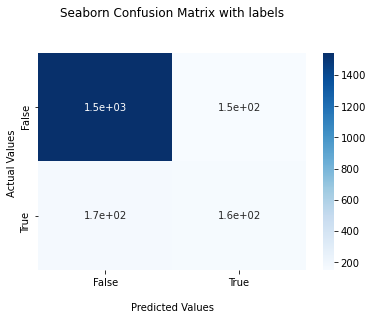

In [165]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# SVM Results

In [166]:
xgb = XGBClassifier(max_depth = 4, verbosity = 0)

# Fit model
xgb = xgb.fit(X_train, y_train)

# Make Predictions
y_pred = xgb.predict_proba(X_test)[:,1]

ROC curve

AUC: 99.57%
Best threshold value is: 0.108289436


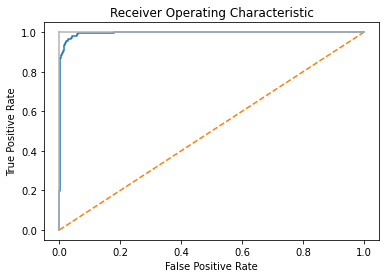

In [167]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Print model AUC
print("AUC: %.2f%%" % (roc_auc_score(y_test, y_pred) * 100.0))

# Print best threshold
optimal_idx = np.argmax(true_positive_rate - false_positive_rate)
optimal_threshold = threshold[optimal_idx]
print("Best threshold value is:", optimal_threshold)

# Ploting ROC curves
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

loss curve

AUC: 94.48%


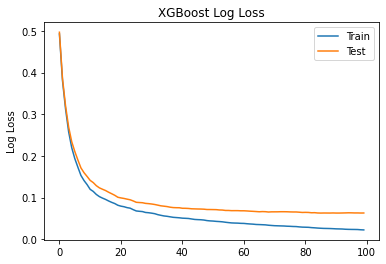

In [168]:
model = XGBClassifier(max_depth = 4)

# Create eval set with both training and test set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit model 
model.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set, verbose=False)

# Make predictions for test data
y_pred = model.predict(X_test)

# Evaluate predictions
auc = roc_auc_score(y_test, y_pred)
print("AUC: %.2f%%" % (auc * 100.0))

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()